## Задание 1. Реализация градиентного спуска (3.5 балла)

Функция потерь MSE:
$$ Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 $$

In [1]:
import numpy as np
import warnings
import time
#warnings.filterwarnings('ignore')

s0_default: float = 1
p_default: float = 0.5

batch_size_default: int = 1

alpha_default: float = 0.1
eps_default: float = 1e-8

mu_default = 1e-2

tolerance_default: float = 1e-3
max_iter_default: int = 1000

class BaseDescent:
    """
    A base class and examples for all functions
    """

    def __init__(self):
        self.w = None

    def step(self, X: np.ndarray, y: np.ndarray, iteration: int) -> np.ndarray:
        """
        Descent step
        :param iteration: iteration number
        :param X: objects' features
        :param y: objects' targets
        :return: difference between weights
        """
        return self.update_weights(self.calc_gradient(X, y), iteration)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Example for update_weights function
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        pass

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Example for calc_gradient function
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        pass


class GradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.w = np.copy(w0)
        
    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        if iteration >= 1:
            self.w -= np.dot(self.eta(iteration), gradient)
        
        return self.w
    
    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        gradient = 2 * np.dot(X.T, np.dot(X, self.w) - y)/y.shape[0]
        
        return gradient


class StochasticDescent(BaseDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default,
                 batch_size: int = batch_size_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        :param batch_size: batch size (int)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.batch_size = batch_size
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        if iteration >= 1:
            self.w -= np.dot(self.eta(iteration), gradient)
        
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        sample = np.random.randint(y.shape[0], size=self.batch_size)
        gradient = 2 * np.dot(X[sample].T, np.dot(X[sample], self.w) - y[sample])/self.batch_size
        
        return gradient


class MomentumDescent(BaseDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, alpha: float = alpha_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param alpha: momentum coefficient
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.alpha = alpha
        self.w = np.copy(w0)
        self.h = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        if iteration >= 1:
            self.h = self.alpha * self.h + np.dot(self.eta(iteration), gradient)
            self.w -= self.h
        
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        gradient = 2 * np.dot(X.T, np.dot(X, self.w) - y)/y.shape[0]
        
        return gradient


class Adagrad(BaseDescent):
    """
    Adaptive gradient algorithm class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, eps: float = eps_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param eps: smoothing term (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.eps = eps
        self.w = np.copy(w0)
        self.g = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        if iteration >= 1:
            self.g += gradient ** 2
            self.w -= np.dot(np.dot(self.eta(iteration), gradient), (self.eps + self.g) ** (-0.5))
        
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        gradient = 2 * np.dot(X.T, np.dot(X, self.w) - y)/y.shape[0]
        
        return gradient


In [2]:
# Проведем тесты для бОльшего числа объектов и признаков:
num_objects = 10000
dimension = 100

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
max_iter = 10
tolerance = 0

w0 = np.zeros(dimension)

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**

In [3]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

start_time = time.time()
descent.step(X, y, 100)
print("--- %s seconds for GradientDescent ---\n" % (time.time() - start_time))



#Сверим результаты работы с более прозрачной тестовой функцией:
def my_test_desc(X, y, w0, iteration):
    w=w0
    eta=lambda k: lambda_ * (s0_default / (s0_default + k)) ** p_default

    for i in range(1,iteration+1):
        gradient = 2 * np.dot(X.T, np.dot(X, w) - y)/y.shape[0]
        w -= eta(i) * gradient

    return w


descent = GradientDescent(lambda_ = lambda_, w0 = w0)

start_time = time.time()
print(descent.step(X, y, 1))

start_time = time.time()
print(my_test_desc(X, y, w0, iteration=1))


--- 0.0016930103302001953 seconds for GradientDescent ---

[0.00353505 0.00353044 0.00353154 0.0035449  0.00355254 0.00354819
 0.0035394  0.00353957 0.00358641 0.00353635 0.00356893 0.00353531
 0.00355137 0.00355177 0.00356326 0.00358135 0.00351173 0.00352579
 0.00357143 0.00358426 0.00354855 0.00353472 0.00357611 0.0035429
 0.00354692 0.00358332 0.00355547 0.00356676 0.00353509 0.00352724
 0.00354615 0.00354995 0.0035282  0.00355179 0.00358577 0.00352946
 0.00350391 0.0035646  0.00351708 0.00357037 0.00352821 0.00353854
 0.00355127 0.00353931 0.00360058 0.00350618 0.00355175 0.00353733
 0.00350358 0.00355909 0.00355325 0.00357837 0.00355904 0.00354581
 0.00357776 0.00356796 0.0035791  0.00354758 0.00356816 0.00357608
 0.00353815 0.00353034 0.00357044 0.00350893 0.00355064 0.00349752
 0.0035277  0.00359319 0.00355552 0.00356278 0.00357681 0.00353758
 0.00356074 0.00355415 0.00350405 0.00357534 0.00355543 0.00354858
 0.00357354 0.00351964 0.00356083 0.0035549  0.00351827 0.0035403
 0.00

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**

In [4]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

start_time = time.time()
descent.step(X, y, 100)
print("--- %s seconds for StochasticDescent ---" % (time.time() - start_time))

--- 0.0001850128173828125 seconds for StochasticDescent ---


**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**

In [5]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

start_time = time.time()
descent.step(X, y, 100)
print("--- %s seconds for MomentumDescent ---" % (time.time() - start_time))

--- 0.010369062423706055 seconds for MomentumDescent ---


**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**

In [6]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

start_time = time.time()
descent.step(X, y, 100)
print("--- %s seconds for Adagrad ---" % (time.time() - start_time))

--- 0.0020160675048828125 seconds for Adagrad ---


## Задание 2. Реализация линейной регресии (1.5 балла)

In [7]:
class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent, tolerance: float = tolerance_default, max_iter: int = max_iter_default):
        """
        :param descent: Descent class
        :param tolerance: float stopping criterion for square of euclidean norm of weight difference
        :param max_iter: int stopping criterion for iterations
        """
        self.descent = descent
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.loss_history = [] # Значения функции потерь до каждого шага, начиная с нулевого
        
    def fit(self, X: np.ndarray, y: np.ndarray): #-> LinearRegression:
        """
        Getting objects, fitting descent weights
        :param X: objects' features
        :param y: objects' target
        :return: self
        """
        # Инициализируем вектор весов
        self.w = np.zeros(X.shape[1])
        # Инициализируем расстояние между векторами весов на соседних итерациях
        weight_dist = np.inf
        # Счетчик итераций
        iter_num = 0

        while weight_dist > self.tolerance and iter_num < self.max_iter:
            iter_num += 1
            new_w = np.append(np.array([]), descent.step(X, y, iter_num))
            weight_dist = np.sqrt(((self.w - new_w)**2).sum())
            self.w = new_w
            self.calc_loss(X, y)
            
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Getting objects, predicting targets
        :param X: objects' features
        :return: predicted targets
        """
        return np.dot(X, self.w)

    def calc_loss(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Getting objects, calculating loss
        :param X: objects' features
        :param y: objects' target
        """
        self.loss_history.append(np.sum((np.dot(X, self.w) - y)**2)/y.shape[0])
        

In [8]:
w0 = np.zeros(dimension)

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

In [9]:
reg = regression.fit(X, y)
y_train_pred = reg.predict(X)
y_train_pred

array([0.50464704, 0.51560209, 0.4811209 , ..., 0.53077855, 0.52531193,
       0.51799994])

Проверим, насколько похожи результаты по сравнению линейной регрессией в sklearn:

In [10]:
from sklearn.linear_model import LinearRegression as LR
reg2 = LR().fit(X, y)
y_train_pred2 = reg2.predict(X)
y_train_pred2

array([0.52560197, 0.50788668, 0.55370621, ..., 0.48193753, 0.4782532 ,
       0.50834824])

## Задание 4. Работа с данными (1 балл)

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
%matplotlib inline

df = pd.read_csv('autos.csv')
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000


In [12]:
# Преобразуем даты и время в datetime объекты:
df["dateCreated"] = pd.to_datetime(df.dateCreated)
df["lastSeen"] = pd.to_datetime(df.lastSeen)

# Добавим к нашей выборке новую колонку - логарифм таргета price 
df['log_price'] = np.log(df.price)
df = df.drop(columns = 'price')

Text(0.5,1,'Распределение логарифма стоимости автомобилей')

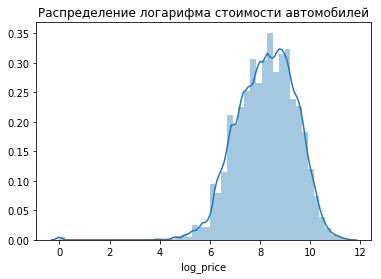

In [13]:
# Нарисуем гистограмму модифицированного таргета по обучающей выборке
sns.distplot(df.log_price)
plt.title('Распределение логарифма стоимости автомобилей')

In [14]:
# Ознакомимся с числом уникальных элементов в каждом из признаков:
df.nunique()

brand                      39
model                     250
vehicleType                 8
gearbox                     2
fuelType                    7
notRepairedDamage           2
powerPS                   496
kilometer                  13
yearOfRegistration         85
monthOfRegistration        13
dateCreated               107
lastSeen               129878
postalCode               8070
log_price                4951
dtype: int64

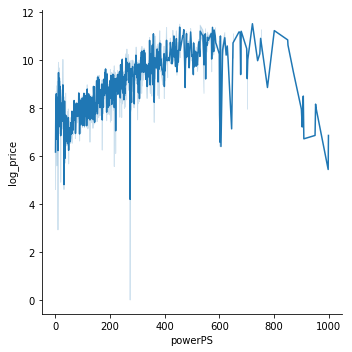

In [15]:
# Изучим зависимости нашего таргета от части признаков
sns.relplot(data=df, x="powerPS", y="log_price", kind="line", legend="full")

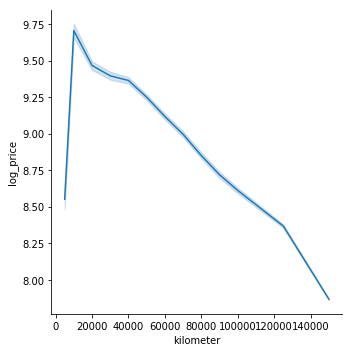

In [16]:
sns.relplot(data=df, x="kilometer", y="log_price", kind="line", legend="full")

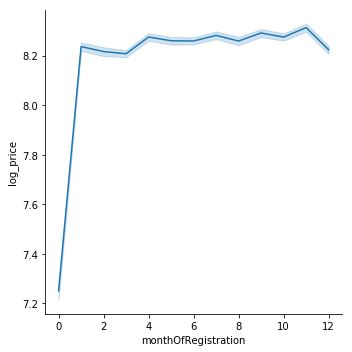

In [17]:
sns.relplot(data=df, x="monthOfRegistration", y="log_price", kind="line", legend="full")

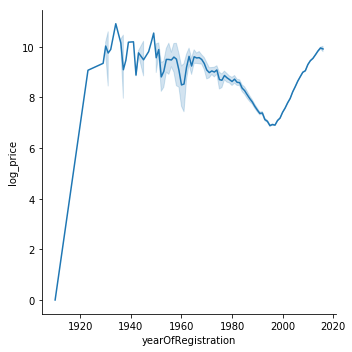

In [18]:
sns.relplot(data=df, x="yearOfRegistration", y="log_price", kind="line", legend="full")

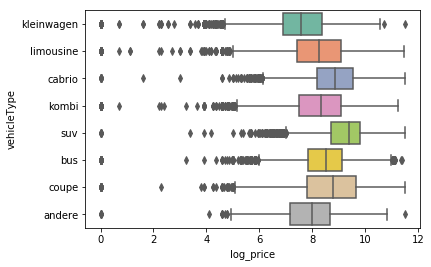

In [19]:
sns.boxplot(data=df, x="log_price", y="vehicleType", orient="h", palette="Set2")

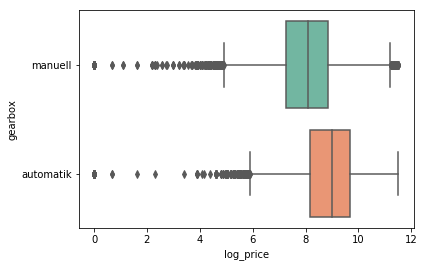

In [20]:
sns.boxplot(data=df, x="log_price", y="gearbox", orient="h", palette="Set2")

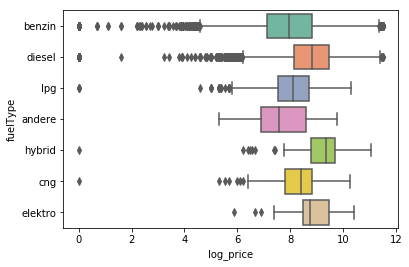

In [21]:
sns.boxplot(data=df, x="log_price", y="fuelType", orient="h", palette="Set2")

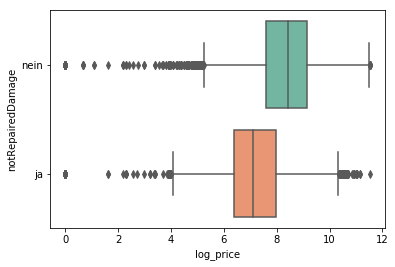

In [22]:
sns.boxplot(data=df, x="log_price", y="notRepairedDamage", orient="h", palette="Set2")

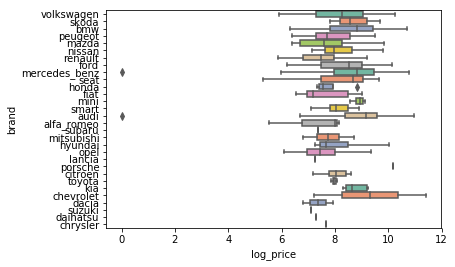

In [23]:
# На части выборки проверим наличие зависимости от бренда
sns.boxplot(data=df[:500], x="log_price", y="brand", orient="h", palette="Set2")

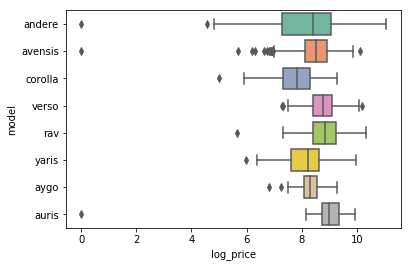

In [24]:
# На части выборки (на примере бренда toyota) проверим наличие зависимости стоимости от модели
sns.boxplot(data=df[df.brand=='toyota'], x="log_price", y="model", orient="h", palette="Set2")

Все рассмотренные выше признаки будем учитывать в обучении модели

In [25]:
from sklearn.model_selection import train_test_split

#Разделим выборку на тренировочную, тестовую и валидационную в отношении 3:1:1
train, test = train_test_split(df, test_size=0.4, random_state=10)
test, validation = train_test_split(test, test_size=0.5, random_state=10)